# Sales Analysis

In [1]:
import pandas as pd
import os

### TASK 1:  merging 12 months of sales data into a single file

In [16]:

all_months_data=pd.DataFrame()
files = [file for file in os.listdir(r'C:\Users\veena\OneDrive\Desktop\DATA ANALYTICS RESOURCES\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]
for file in files:
    df = pd.read_csv(r"C:\Users\veena\OneDrive\Desktop\DATA ANALYTICS RESOURCES\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data/"+file)
    all_months_data=pd.concat([all_months_data,df])
all_months_data.to_csv("all_data.csv",index=False)


## READ IN UPDATED DATAFRAME


In [2]:
data=pd.read_csv(r'all_data.csv')
data.shape

(186850, 6)

### to find out the records which contain Nans

In [3]:
data[data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.dropna(how='all' , inplace=True)

In [5]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### find 'Or' and delete it

In [6]:
data=data[data['Order Date'].str[0:2]!='Or']


(186495, 6)

## TASK 2 : ADD MONTH COLUMN


In [7]:
data['Month']= data['Order Date'].str[0:2]
data['Month']=data['Month'].astype(int)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## TASK 3 : ADD A SALES COLUMN


In [8]:

#print(data.dtypes)
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])
data['sales']=data['Quantity Ordered']*data['Price Each']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## QUESTION 1: What was the best month for sales? How much was earned that month?

In [18]:
result= data.groupby('Month').sales.sum()  

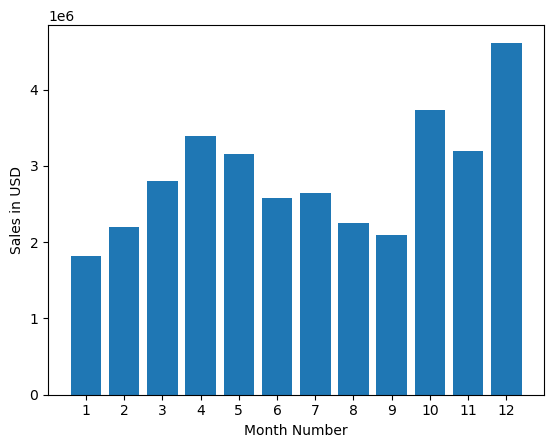

In [19]:
import matplotlib.pyplot as plt
months=range(1,13)
plt.bar(months,result)
plt.xticks(months)
plt.ylabel("Sales in USD")
plt.xlabel("Month Number")
plt.show()

# QUESTION 2 : WHAT CITY HAD HIGHEST NUMBER OF SALES?

In [20]:
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [48]:

data['City'] = data['Purchase Address'].apply(lambda x : x.split(',')[1].strip() + ' ' + x.split(',')[2].split(' ')[1].strip())
data['City'].unique()

array(['Dallas TX', 'Boston MA', 'Los Angeles CA', 'San Francisco CA',
       'Seattle WA', 'Atlanta GA', 'New York City NY', 'Portland OR',
       'Austin TX', 'Portland ME'], dtype=object)

In [54]:
result= data.groupby('City').sales.mean()
print(data['City'].unique(), result)

['Dallas TX' 'Boston MA' 'Los Angeles CA' 'San Francisco CA' 'Seattle WA'
 'Atlanta GA' 'New York City NY' 'Portland OR' 'Austin TX' 'Portland ME'] City
Atlanta GA          187.856903
Austin TX           183.703357
Boston MA           183.688272
Dallas TX           186.772969
Los Angeles CA      184.177362
New York City NY    187.502711
Portland ME         183.200925
Portland OR         186.886348
San Francisco CA    184.704550
Seattle WA          186.516120
Name: sales, dtype: float64


[]

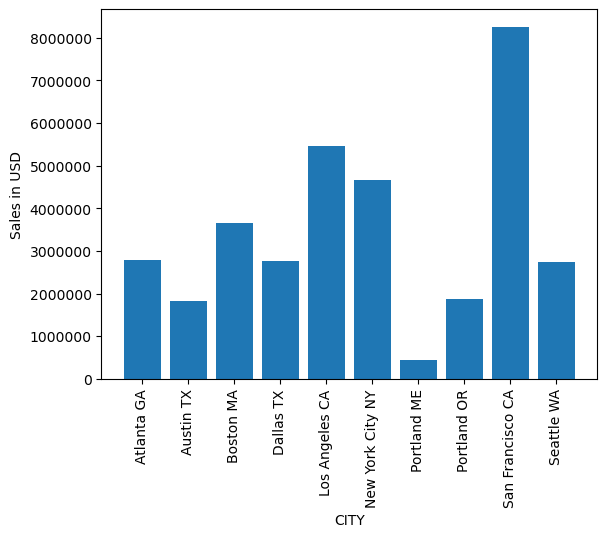

In [51]:
import matplotlib.pyplot as plt
uniqcity= [city for city, df in data.groupby('City')]
plt.bar(uniqcity,result)
plt.xticks(uniqcity, rotation = 'vertical')
plt.ylabel("Sales in USD")
plt.xlabel("CITY")
plt.ticklabel_format(style='plain', axis='y')
plt.plot()

# Question 3 : What time should we display advertisements to maximize the likelihood of customer's buying product?

In [55]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [ ]:
# order date se time extract , group the time into slots ; (01-05,05-09,09-13,13-17,17-21,21-23, 

In [63]:
data['Hour'] = data['Order Date'].apply(lambda x : x.split(':')[0].split(' ')[1].strip())
data['Hour'] = pd.to_numeric(data['Hour'])
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [65]:
result = data.groupby('Hour').sales.sum()
print(result)

Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: sales, dtype: float64


In [66]:
uniqhr= [hr for hr, df in data.groupby('Hour')]

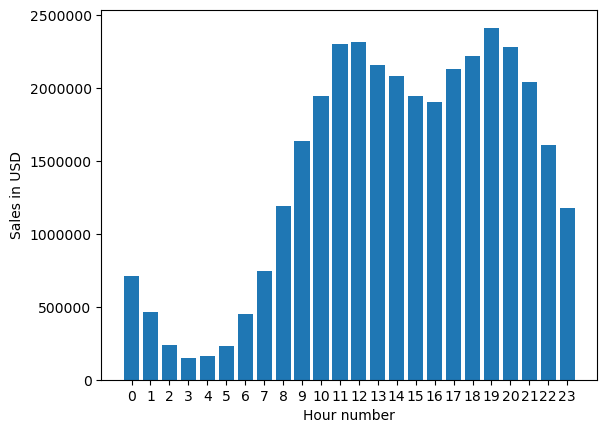

In [69]:
plt.bar(uniqhr,result)
plt.xticks(uniqhr,)
plt.ylabel("Sales in USD")
plt.xlabel("Hour number")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## alternatively safer approach : convert the order date into date time format and 

In [74]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Hour'] = data['Order Date'].dt.hour
data['Minute'] = data['Order Date'].dt.minute
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


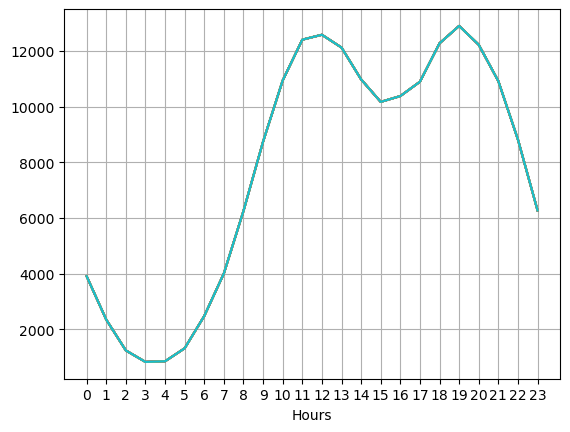

In [77]:
uniqhr= [hr for hr, df in data.groupby('Hour')]
plt.plot(uniqhr,data.groupby('Hour').count())
plt.xticks(uniqhr)
plt.xlabel('Hours')
plt.grid()
plt.show()

In [76]:
data.groupby('Hour').count()  #all sales occurring in the same hour will be grouped together.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


# Question 4: What products are most often sold together?

In [80]:
data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco CA,13,3
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle WA,7,46
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta GA,10,58
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco CA,10,38
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston MA,14,5


In [79]:
data['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [ ]:
# jinki order id same hai unka ek pair banega and unki frq of buying niklegi

In [115]:
df= data[data['Order ID'].duplicated(keep=False)]
df['grouped']=df.groupby('Order ID').Product.transform(lambda x : ','.join(x))
df=df[['Order ID','grouped']].drop_duplicates()
df

C:\Users\veena\AppData\Local\Temp\ipykernel_11056\3391094172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped']=df.groupby('Order ID').Product.transform(lambda x : ','.join(x))


,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [114]:
df['grouped'].value_counts()   #problem in this one altho correct solution , counts ("pen,paper") and ("Paper, pen ") separately

grouped
iPhone,Lightning Charging Cable                                            882
Google Phone,USB-C Charging Cable                                          856
iPhone,Wired Headphones                                                    361
Vareebadd Phone,USB-C Charging Cable                                       312
Google Phone,Wired Headphones                                              303
                                                                          ... 
Google Phone,USB-C Charging Cable,Wired Headphones,USB-C Charging Cable      1
34in Ultrawide Monitor,LG Washing Machine                                    1
20in Monitor,iPhone                                                          1
Google Phone,USB-C Charging Cable,Wired Headphones,27in FHD Monitor          1
LG Washing Machine,AA Batteries (4-pack)                                     1
Name: count, Length: 366, dtype: int64

In [118]:
from itertools import combinations
from collections import Counter

count =Counter()
for row in df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

# Question 5: What product sold the most? why do you think it was sold the most?

In [119]:
data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour,Minute,grouped
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas TX,8,46,NaN


In [129]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [154]:
data.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

Sales Data Analysis Using python
-made use of pandas library, data cleaning my removing inconsistent data
-merged 12 months of data into single csv file,data organising to a consistent format
-Made visualisations to discover trends and answer questions
